In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Identificando el tipo de datos de cada encabezado

In [2]:
print(tienda.dtypes)

Producto                   object
Categoría del Producto     object
Precio                    float64
Costo de envío            float64
Fecha de Compra            object
Vendedor                   object
Lugar de Compra            object
Calificación                int64
Método de pago             object
Cantidad de cuotas          int64
lat                       float64
lon                       float64
dtype: object


object → si es texto string

int64 → si es número entero

float64 → si es número decimal

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

**Ventas totales por tienda**

Para formatear los datos numericos presentados en los informes

In [3]:
def formato_latino(numero):
    return f'{numero:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

In [4]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

total_ventas = {tienda_: df['Precio'].sum() for tienda_, df in tiendas.items()}

for tienda_, total in total_ventas.items():
  print(f"\033[1mEl total de ventas de la {tienda_} es \033[0m: ${formato_latino(total)}")

El total de ventas de la Tienda 1 es : $1.150.880.400,00
El total de ventas de la Tienda 2 es : $1.116.343.500,00
El total de ventas de la Tienda 3 es : $1.098.019.600,00
El total de ventas de la Tienda 4 es : $1.038.375.700,00


En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [9]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

ventas_por_categoria = {
    tienda_: df.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
    for tienda_, df in tiendas.items()
}

In [10]:
ventas_ordenadas = {
    tienda_: df.sort_values('Cantidad Vendida', ascending=False)
    for tienda_, df in ventas_por_categoria.items()
}

In [12]:
for tienda_, df in ventas_ordenadas.items():
    print(f"\n\033[1m{tienda_} - Categorías ordenadas de forma descendente por cantidad vendida:\033[0m\n\n")
    print(df.to_string(index=False))


Tienda 1 - Categorías ordenadas de forma descendente por cantidad vendida:


 Categoría del Producto  Cantidad Vendida
                Muebles               465
           Electrónicos               448
               Juguetes               324
      Electrodomésticos               312
   Deportes y diversión               284
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171

Tienda 2 - Categorías ordenadas de forma descendente por cantidad vendida:


 Categoría del Producto  Cantidad Vendida
                Muebles               442
           Electrónicos               422
               Juguetes               313
      Electrodomésticos               305
   Deportes y diversión               275
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181

Tienda 3 - Categorías ordenadas de forma descendente por cantidad vendida:


 Categoría

In [13]:
for tienda_, df in ventas_ordenadas.items():
    print(f"\n\033[1m{tienda_} - Top 3 categorías más vendidas:\033[0m\n")
    print(df.head(3).to_string(index=False))


Tienda 1 - Top 3 categorías más vendidas:

Categoría del Producto  Cantidad Vendida
               Muebles               465
          Electrónicos               448
              Juguetes               324

Tienda 2 - Top 3 categorías más vendidas:

Categoría del Producto  Cantidad Vendida
               Muebles               442
          Electrónicos               422
              Juguetes               313

Tienda 3 - Top 3 categorías más vendidas:

Categoría del Producto  Cantidad Vendida
               Muebles               499
          Electrónicos               451
              Juguetes               315

Tienda 4 - Top 3 categorías más vendidas:

Categoría del Producto  Cantidad Vendida
               Muebles               480
          Electrónicos               451
              Juguetes               338


In [ ]:
for tienda_, df in ventas_ordenadas.items():
    print(f"\n\033[1m{tienda_} - Top 3 categorías menos vendidas:\033[0m\n")
    print(df.tail(3).to_string(index=False))


Tienda 1 - Top 3 categorías menos vendidas:

 Categoría del Producto  Cantidad Vendida
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171

Tienda 2 - Top 3 categorías menos vendidas:

 Categoría del Producto  Cantidad Vendida
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181

Tienda 3 - Top 3 categorías menos vendidas:

 Categoría del Producto  Cantidad Vendida
                 Libros               185
Artículos para el hogar               177
 Instrumentos musicales               177

Tienda 4 - Top 3 categorías menos vendidas:

 Categoría del Producto  Cantidad Vendida
Artículos para el hogar               201
                 Libros               187
 Instrumentos musicales               170


**En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.**

**- Calificacion promedio total por tienda**

In [22]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

promedio_calificaciones_tienda = {
    tienda_: df['Calificación'].mean()
    for tienda_, df in tiendas.items()
}

In [24]:
for tienda, promedio in promedio_calificaciones_tienda.items():
    print(f'\n\033[1mEl Promedio de todas las calificaciones por producto en la {tienda} es:\033[0m {promedio:.2f}')


El Promedio de todas las calificaciones por producto en la Tienda 1 es: 3.98

El Promedio de todas las calificaciones por producto en la Tienda 2 es: 4.04

El Promedio de todas las calificaciones por producto en la Tienda 3 es: 4.05

El Promedio de todas las calificaciones por producto en la Tienda 4 es: 4.00


In [ ]:
import matplotlib.pyplot as plt

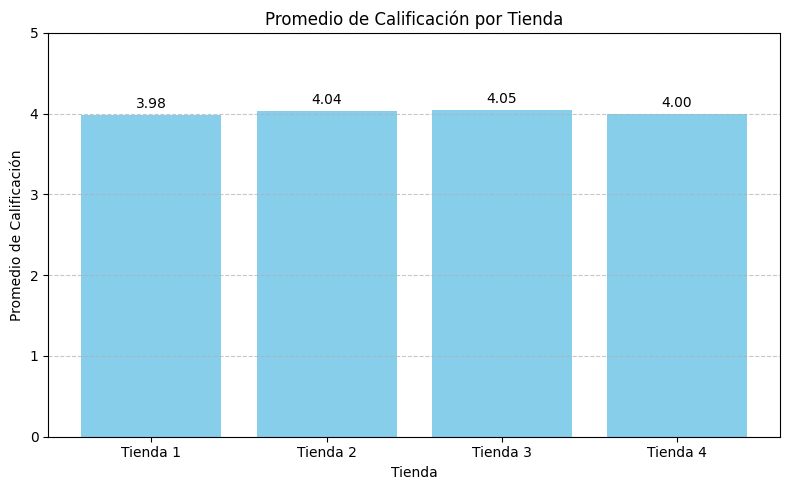

In [ ]:
nombre_tiendas = list(promedio_calificaciones_tienda.keys())
promedios = list(promedio_calificaciones_tienda.values())

plt.figure(figsize=(8, 5))
barras = plt.bar(nombre_tiendas, promedios, color='skyblue')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Calificación')
plt.title('Promedio de Calificación por Tienda')
plt.ylim(0, 5)  # Asumiendo escala de calificación de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.05, f'{altura:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



**- Calificaciones por producto de cada tienda**


In [ ]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

promedios_por_tienda = {
    tienda_: df.groupby('Producto')['Calificación'].mean().reset_index().sort_values(by='Calificación', ascending=False)
    for tienda_, df in tiendas.items()
}

In [ ]:
for tienda_, df_promedio in promedios_por_tienda.items():
    print(f'\n\033[1mEl Promedio de calificaciones por producto en la {tienda_} (en orden descendente) son:\033[0m\n')
    print(df_promedio.to_string(index=False))


El Promedio de calificaciones por producto en la Tienda 1 (en orden descendente) son:

                   Producto  Calificación
          Ajedrez de madera      4.428571
  Iniciando en programación      4.292683
                 Cubertería      4.230769
                 Smartwatch      4.209302
                    Batería      4.188679
                  Impresora      4.166667
                Tablet ABXY      4.142857
  Carrito de control remoto      4.134615
                     Estufa      4.133333
           Lavadora de ropa      4.127660
                   Cama box      4.113636
              Kit de bancas      4.113636
Ciencia de datos con Python      4.102564
    Bloques de construcción      4.089286
         Guitarra eléctrica      4.085106
          Asistente virtual      4.075000
                     Sillón      4.073171
          Balón de voleibol      4.071429
            Cubo mágico 8x8      4.068182
              TV LED UHD 4K      4.050000
             Mesa de centro   

**En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.**

In [ ]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}


ventas_por_producto = {
    tienda_: df.groupby('Producto').size().reset_index(name='Cantidad Vendida').sort_values(by='Cantidad Vendida', ascending=False)
    for tienda_, df in tiendas.items()
}

In [ ]:
for tienda_, df_ventas in ventas_por_producto.items():
    print(f'\n\033[1mLos 5 productos más vendidos en la {tienda_} (en orden descendente):\033[0m\n')
    df_ordenado = df_ventas.sort_values(by='Cantidad Vendida', ascending=False)
    print(df_ordenado.head(5).to_string(index=False))


Los 5 productos más vendidos en la Tienda 1 (en orden descendente):

        Producto  Cantidad Vendida
         Armario                60
   TV LED UHD 4K                60
      Microondas                60
Secadora de ropa                58
   Mesa de noche                56

Los 5 productos más vendidos en la Tienda 2 (en orden descendente):

                 Producto  Cantidad Vendida
Iniciando en programación                65
               Microondas                62
                  Batería                61
                Pandereta                58
        Guitarra acústica                58

Los 5 productos más vendidos en la Tienda 3 (en orden descendente):

       Producto  Cantidad Vendida
  Kit de bancas                57
Mesa de comedor                56
      Cama king                56
   Set de ollas                55
  Mesa de noche                55

Los 5 productos más vendidos en la Tienda 4 (en orden descendente):

                 Producto  Cantidad Vendid

In [ ]:
for tienda_, df_ventas in ventas_por_producto.items():
    print(f'\n\033[1mLos 5 productos menos vendidos en la {tienda_} (en orden descendente):\033[0m\n')
    df_ordenado = df_ventas.sort_values(by='Cantidad Vendida', ascending=True)
    print(df_ordenado.head(5).to_string(index=False))


Los 5 productos menos vendidos en la Tienda 1 (en orden descendente):

                   Producto  Cantidad Vendida
               Celular ABXY                33
  Auriculares con micrófono                33
            Olla de presión                35
                  Pandereta                36
Ciencia de datos con Python                39

Los 5 productos menos vendidos en la Tienda 2 (en orden descendente):

       Producto  Cantidad Vendida
  Juego de mesa                32
      Impresora                34
Mesa de comedor                34
         Sillón                35
    Auriculares                37

Los 5 productos menos vendidos en la Tienda 3 (en orden descendente):

               Producto  Cantidad Vendida
Bloques de construcción                35
           Set de vasos                36
                Mochila                36
             Microondas                36
           Vaso térmico                38

Los 5 productos menos vendidos en la Tienda 4 (en o

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
tienda.head()

In [ ]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

promedio_envio_por_tienda = {
    tienda_: df['Costo de envío'].mean()
    for tienda_, df in tiendas.items()
}

for tienda_, promedio in promedio_envio_por_tienda.items():
    print(f'\n\033[1mEl costo de envio promedio de la {tienda_} es:\033[0m $ {formato_latino(promedio)}')



El costo de envio promedio de la Tienda 1 es: $ 26.018,61

El costo de envio promedio de la Tienda 2 es: $ 25.216,24

El costo de envio promedio de la Tienda 3 es: $ 24.805,68

El costo de envio promedio de la Tienda 4 es: $ 23.459,46


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

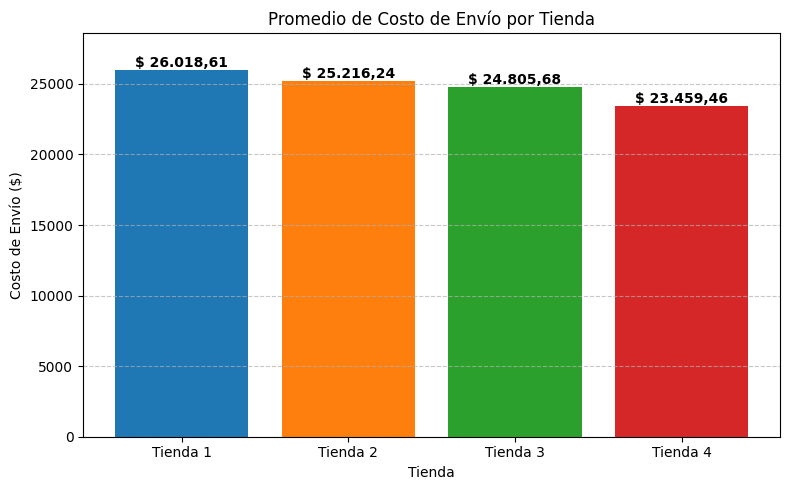

In [ ]:
# Datos del gráfico
nombre_tiendas = list(promedio_envio_por_tienda.keys())
valores_promedio = list(promedio_envio_por_tienda.values())

# Colores para cada tienda
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Creaando el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))
barras = ax.bar(nombre_tiendas, valores_promedio, color=colores)
ax.set_title('Promedio de Costo de Envío por Tienda')
ax.set_ylabel('Costo de Envío ($)')
ax.set_xlabel('Tienda')
ax.set_ylim(0, max(valores_promedio) * 1.1)
ax.grid(axis='y', linestyle='--', alpha=0.7)


# Añadir etiquetas de valores para cada barra
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'$ {formato_latino(altura)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
# Mostrar gráfico
plt.show()

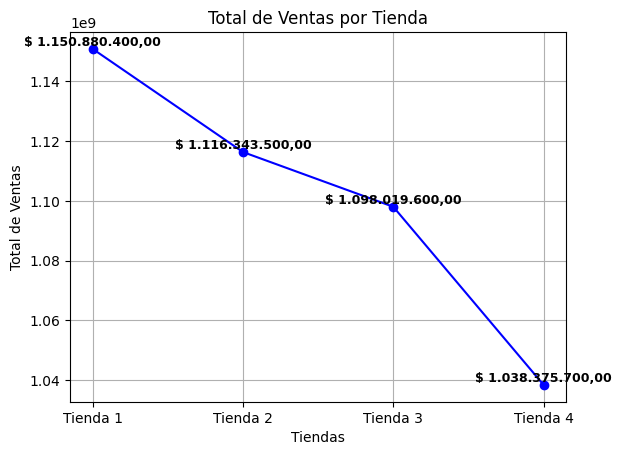

In [ ]:
nombre_tiendas = list(total_ventas.keys())
valores_ventas = list(total_ventas.values())

plt.plot(nombre_tiendas, valores_ventas, marker='o', linestyle='-', color='blue')

for i, valor in enumerate(valores_ventas):
    plt.text(nombre_tiendas[i], valor, f'$ {formato_latino(valor)}', ha='center', va='bottom', fontsize=9, fontweight='bold')


plt.title('Total de Ventas por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Total de Ventas')
plt.grid(True)


plt.show()

Esto debo revisarlo

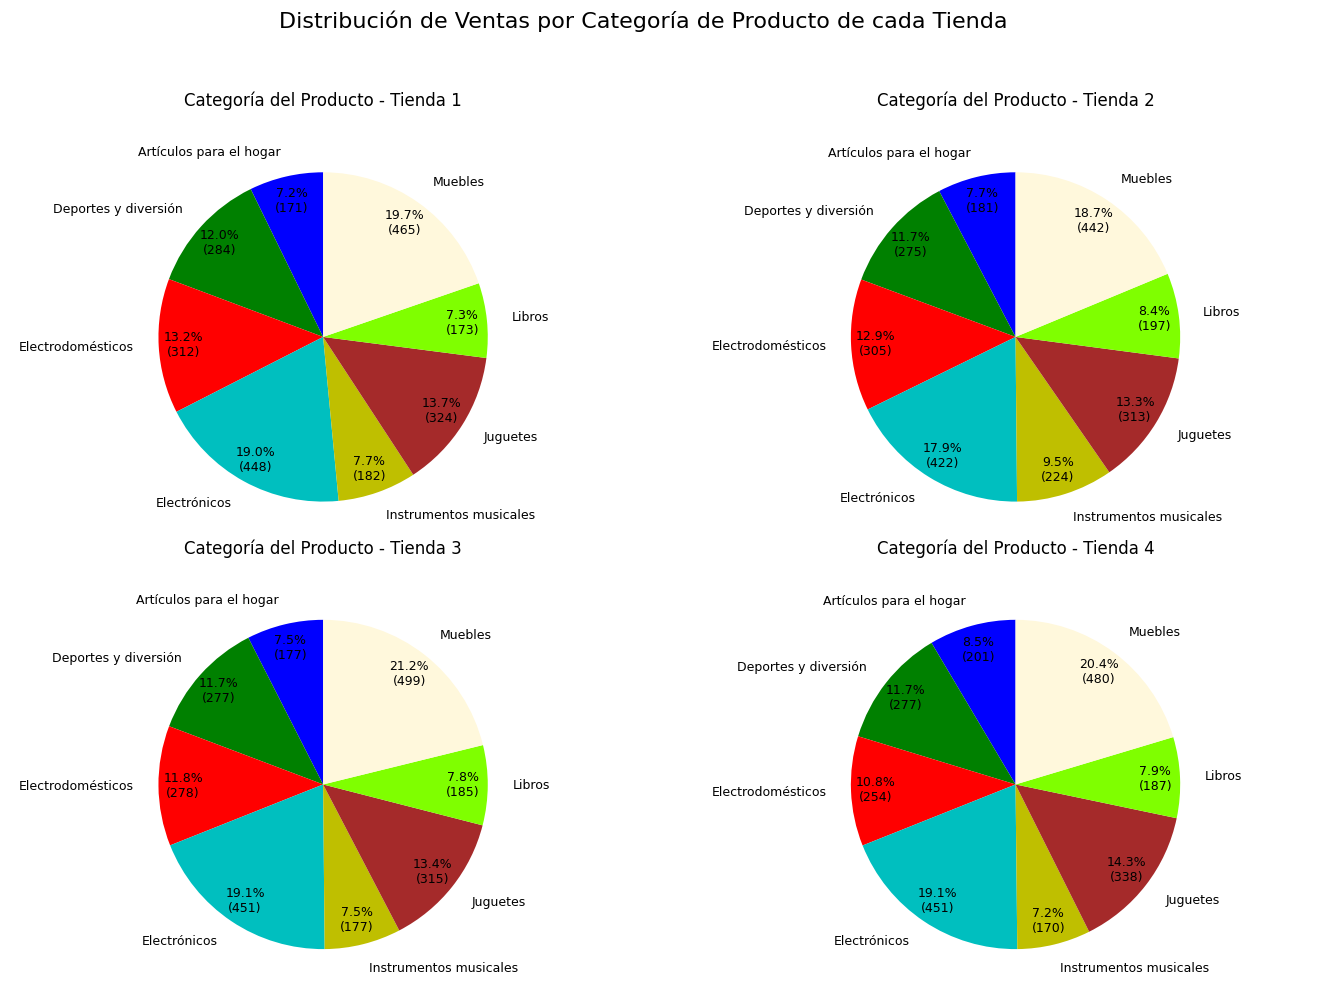

In [ ]:
datos_tiendas = [
    (ventas_por_categoria, 'Tienda 1'),
    (ventas_por_categoria_t2, 'Tienda 2'),
    (ventas_por_categoria_t3, 'Tienda 3'),
    (ventas_por_categoria_t4, 'Tienda 4')
]

# Lista de colores del grafico (8)
colores = ['#0000FF', '#008000', '#FF0000', '#00BFBF', '#BFBF00', '#A52A2A', '#7FFF00', '#FFF8DC']

# Función para etiquetas con porcentaje y cantidad
def etiquetar(pct, allvals):
    cantidad = int(round(pct / 100. * sum(allvals)))
    return f'{pct:.1f}%\n({cantidad})'

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax, (df, nombre) in zip(axs.flat, datos_tiendas):
    categorias = df['Categoría del Producto']
    cantidades = df['Cantidad Vendida']



    # Creando gráfico circular
    ax.pie(
        cantidades,
        labels=categorias,
        autopct=lambda pct: etiquetar(pct, cantidades),
        colors=colores,
        startangle=90,
        textprops={'fontsize': 9},
        labeldistance=1.15,
        pctdistance=0.85
    )
    ax.set_title(f'Categoría del Producto - {nombre}\n\n', fontsize=12)
    ax.axis('equal')

plt.suptitle('Distribución de Ventas por Categoría de Producto de cada Tienda', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [21]:
import folium
from folium.plugins import HeatMap

tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Crear mapas por tienda con etiquetas
mapas_por_tienda = {}

for nombre, df in tiendas.items():
    # Agrupando por ubicación
    ventas_por_ubicacion = df.groupby(['lat', 'lon']).size().reset_index(name='Cantidad Vendida')
    heat_list = ventas_por_ubicacion[['lat', 'lon', 'Cantidad Vendida']].values.tolist()

    # Crear mapa base
    mapa = folium.Map(location=[5.5, -74], zoom_start=6)

    #Mapa de calor
    HeatMap(heat_list).add_to(mapa)

    # Añadir etiquetas de cantidad vendida
    for _, row in ventas_por_ubicacion.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=7,
            color='blue',
            fill=True,
            fill_opacity=0.6,
            popup=folium.Popup(f"Ventas: {row['Cantidad Vendida']}", parse_html=True)
        ).add_to(mapa)

    mapas_por_tienda[nombre] = mapa

# Mostrar los mapas uno por uno
for nombre, mapa in mapas_por_tienda.items():
    print(f"Mapa {nombre}")
    display(mapa)

Mapa Tienda 1


Mapa Tienda 2


Mapa Tienda 3


Mapa Tienda 4


**Informe Final**


1.	Análisis de datos
De acuerdo con los datos analizados respecto a las tiendas del Sr. Juan y respecto a los siguientes tópicos de cada tienda:

•	Los ingresos totales de las tiendas.

•	Las categorías de productos más y menos vendidas.

•	Las calificaciones promedio de los clientes por tienda.

•	Los productos más y menos vendidos.

•	El coste de envío promedio para cada tienda.

Procedemos al siguiente informe:

Tienda 1:

*   Los ingresos totales por venta de esta tienda corresponden a $ 1.150.880.400.

*   El Promedio de todas las calificaciones por producto en la tienda es: 3.98.
*   Las 3 categorías de productos más y menos vendidos se presentan en el código.
*   Los 5 productos más y menos vendidos se presentan en el código.
*   El costo de envío promedio de esta tienda es: $ 26.018,61.

Tienda 2:

*   Los ingresos totales por venta de esta tienda corresponden a $ 1.116.343.500.

*   El Promedio de todas las calificaciones por producto en la tienda es: 4.04.
*   Las 3 categorías de productos más y menos vendidos se presentan en el código.
*   Los 5 productos más y menos vendidos se presentan en el código.
*   El costo de envío promedio de esta tienda es: $ 25.216,24.

Tienda 3:

*   Los ingresos totales por venta de esta tienda corresponden a $ 1.098.019.600.

*   El Promedio de todas las calificaciones por producto en la tienda es: 4.05.
*   Las 3 categorías de productos más y menos vendidos se presentan en el código.
*   Los 5 productos más y menos vendidos se presentan en el código.
*   El costo de envío promedio de esta tienda es: $ 24.805,68.

Tienda 4:

*   Los ingresos totales por venta de esta tienda corresponden a $ 1.038.375.700.

*   El Promedio de todas las calificaciones por producto en la tienda es: 4.00.
*   Las 3 categorías de productos más y menos vendidos se presentan en el código.
*   Los 5 productos más y menos vendidos se presentan en el código.
*   El costo de envío promedio de esta tienda es: $ 23.459,46.




2.	Conclusiones


•	Si la decisión de vender una tienda o no, se basa exclusivamente en las ventas de la misma, la tienda que presenta los menores ingresos por venta corresponde a la tienda 4, con una venta total de $ 1.038.375.700, con una diferencia de $ 120.000.000 menos respecto de la que lidera las ventas totales por venta, que es la tienda 1, esto es un 10,83% menos. Para más información ver gráfico Total de Ventas por Tienda en el código.

•	Si la decisión se basa por la gestión de cada tienda, la tienda 1 es la que presenta la más baja calificación por tienda dada por los clientes, además de tener los mayores costos promedios de envío por tienda (sus costos exceden en un 10,9% respecto de la tienda con menores costos). Para más información ver gráficos de Promedio de Calificación por Tienda y Promedio de Costo de Envío por Tienda en el código.
